#1. Mount Drive

In [1]:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [43]:
!ls -al '/gdrive/My Drive/data'

total 2193336
-rw------- 1 root root    337847 Feb  2 11:56 data_202001.csv
-rw------- 1 root root    314682 Feb  2 10:30 data_202002.csv
-rw------- 1 root root    335953 Feb  2 10:35 data_202003.csv
-rw------- 1 root root    988308 Feb  2 11:58 data_2020.csv
-rw------- 1 root root   9453240 Aug  7  2019 marathon_2015_2017.csv
-rw------- 1 root root   4228123 Apr 29  2017 marathon_results_2015.csv
-rw------- 1 root root   4244383 Apr 29  2017 marathon_results_2016.csv
-rw------- 1 root root   4196246 Apr 29  2017 marathon_results_2017.csv
-rw------- 1 root root 783889122 Jan 30 17:16 TCS_영업소간통행시간_1시간_1개월_202001
-rw------- 1 root root 699429059 Jan 31 06:59 TCS_영업소간통행시간_1시간_1개월_202002
-rw------- 1 root root 738556069 Jan 31 06:59 TCS_영업소간통행시간_1시간_1개월_202003


#2. Korean Character

In [1]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
0 upgraded, 0 newly installed, 0 to remove and 15 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent cache directory
/root/.fontconfig: not cleaning non-existent cache directory
fc-cache: succeeded


런타임 - 런타임 다시 시작

matplotlib의 폰트를 Nanum 폰트로 지정

In [1]:
# Import pyplot as a alias 'plt'
import matplotlib.pyplot as plt

In [2]:
plt.rc('font', family='NanumBarunGothic')

#3. Load Data

In [3]:
import pandas as pd

In [4]:
# Load a file under "data" folder
file = "/gdrive/My Drive/data/data_2020.csv"
data = pd.read_csv(file)

In [5]:
data.head()

,집계일자,집계시,출발영업소코드,도착영업소코드,통행시간,요일
0,20200101,4,101,105,637,2
1,20200101,4,101,105,773,2
2,20200101,4,101,105,762,2
3,20200101,4,101,105,746,2
4,20200101,4,101,105,875,2


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37356 entries, 0 to 37355
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   집계일자     37356 non-null  int64
 1   집계시      37356 non-null  int64
 2   출발영업소코드  37356 non-null  int64
 3   도착영업소코드  37356 non-null  int64
 4   통행시간     37356 non-null  int64
 5   요일       37356 non-null  int64
dtypes: int64(6)
memory usage: 1.7 MB


#4. Bubble Chart, 도착영업소코드

In [7]:
data_destnation_mean = data.groupby(by='도착영업소코드').mean()
data_destination_count = data.groupby(by=['도착영업소코드']).count()

In [8]:
data_destnation_mean

,집계일자,집계시,출발영업소코드,통행시간,요일
도착영업소코드,,,,,
105,2.020022e+07,11.473847,101.0,846.317989,2.912498
110,2.020022e+07,11.434760,101.0,3489.680858,2.803907
115,2.020022e+07,11.842218,101.0,5554.963282,2.975419
120,2.020021e+07,13.086698,101.0,8030.088683,3.131701
125,2.020021e+07,12.911747,101.0,9313.118068,2.889684
130,2.020021e+07,13.133367,101.0,9081.853955,2.946755
135,2.020021e+07,12.922683,101.0,13220.962479,3.123934
140,2.020022e+07,12.181655,101.0,15646.596868,3.006711


In [9]:
data_destination_count

,집계일자,집계시,출발영업소코드,통행시간,요일
도착영업소코드,,,,,
105,12274,12274,12274,12274,12274
110,9419,9419,9419,9419,9419
115,6509,6509,6509,6509,6509
120,1511,1511,1511,1511,1511
125,1677,1677,1677,1677,1677
130,1972,1972,1972,1972,1972
135,1759,1759,1759,1759,1759
140,2235,2235,2235,2235,2235


In [10]:
data_destnation_mean_time = data_destnation_mean['통행시간']
data_destination_count_time = data_destination_count['통행시간']

In [11]:
data_destnation_mean_time

도착영업소코드
105      846.317989
110     3489.680858
115     5554.963282
120     8030.088683
125     9313.118068
130     9081.853955
135    13220.962479
140    15646.596868
Name: 통행시간, dtype: float64

In [12]:
data_destination_count_time

도착영업소코드
105    12274
110     9419
115     6509
120     1511
125     1677
130     1972
135     1759
140     2235
Name: 통행시간, dtype: int64

In [13]:
x = data_destnation_mean_time.index

In [14]:
#101,서울 105,기흥 110,목천 115,대전 120,황간 125,남구미 130,동김천 135,경주 140,부산
labels = ['기흥', '목천', '대전', '황간', '남구미', '동김천', '경주', '부산']

In [15]:
values = data_destnation_mean_time.values

In [16]:
counts = data_destination_count_time.values

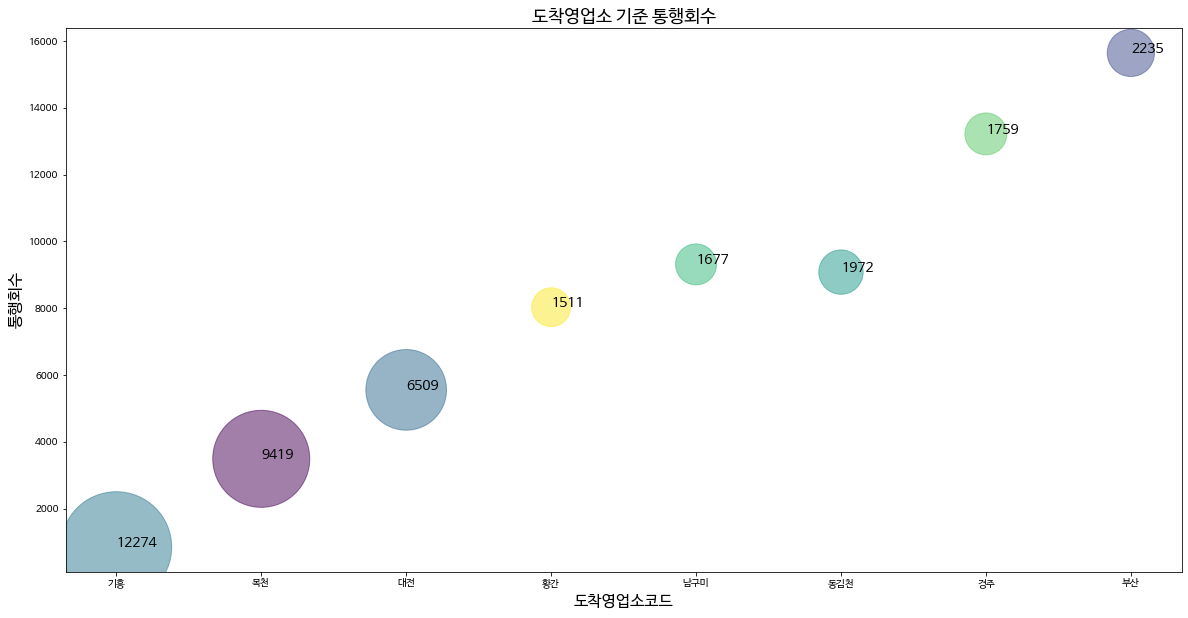

In [20]:
import numpy as np

colors = np.random.rand(len(labels))
# Configure figure size
plt.figure(figsize=(20,10))
# Creae bubble Chart
plt.scatter(labels, values, s=counts, c=colors, alpha=0.5)

for i, txt in enumerate(counts):
    plt.annotate(txt, (labels[i], values[i]), fontsize=14)

# Generate labels and title
plt.title("도착영업소 기준 통행회수",fontsize=18)
plt.xlabel('도착영업소코드', fontdict= {'size':16})
plt.ylabel('통행회수', fontdict= {'size':16})
# Show plot
plt.show()

#5. Geo Chart

In [21]:
# Import folium : https://python-visualization.github.io/folium/
import folium

In [22]:
#101,서울 105,기흥 110,목천 115,대전 120,황간 125,남구미 130,동김천 135,경주 140,부산
#http://data.ex.co.kr/link/linkList?pn=1&linkId=2
#{"code": 101, "name": "서울", "long": 127.102083, "lat": 37.365071},
locations = [
            {"code": 105, "name": "기흥", "long": 127.102439, "lat": 37.222249},
            {"code": 110, "name": "목천", "long": 127.230613, "lat": 36.768046},
            {"code": 115, "name": "대전", "long": 127.448328, "lat": 36.361320},
            {"code": 120, "name": "황간", "long": 127.901970, "lat": 36.223015},
            {"code": 125, "name": "남구미", "long": 128.371780, "lat": 36.072653},
            {"code": 130, "name": "동김천", "long": 128.175000, "lat": 36.140000},
            {"code": 135, "name": "경주", "long": 129.188771, "lat": 35.809907},
            {"code": 140, "name": "부산", "long": 129.105170, "lat": 35.278705}
        ] 

In [ ]:
idx = 1
location = locations[idx]
folium.Map(location=[location['lat'], location['long']])

In [ ]:
folium.Map(location=[location['lat'], location['long']],
           tiles='Stamen Toner', # "Stamen Terrain", "cartodbpositron"
           zoom_start=13
    )

In [ ]:
map = folium.Map(location=[location['lat'], location['long']],
           tiles='Stamen Terrain', # "Stamen Toner", "cartodbpositron"
           zoom_start=13
    )
popup = str(location['code']) + '. ' + location['name']
folium.Marker([location['lat'], location['long']], 
               popup=popup, tooltip=location['code'],
               icon=folium.Icon(color='red', icon='info-sign')).add_to(map)
map

In [27]:
counts

array([12274,  9419,  6509,  1511,  1677,  1972,  1759,  2235])

In [28]:
counts.max()

12274

In [ ]:
max_radius = 50
radius = int(max_radius * counts[idx]/counts.max())
color = 'green'
map = folium.Map(location=[location['lat'], location['long']],
           tiles='cartodbpositron', # "Stamen Toner", "Stamen Terrain"
           zoom_start=8
    )
popup = location['name'] + ' : ' + str(counts[idx])
folium.CircleMarker([location['lat'], location['long']], 
               radius=radius, color=color, fill=True, fill_color=color, popup=popup).add_to(map)
map

In [31]:
max_radius = 50
color = 'green'

def putCircle(idx):
    location = locations[idx]
    radius = int(max_radius * counts[idx]/counts.max())
    popup = location['name'] + str(counts[idx])
    folium.CircleMarker([location['lat'], location['long']], 
            radius=radius, color=color, fill=True, fill_color=color, popup=popup).add_to(map)
            
center = int(len(locations) / 2)
map = folium.Map(location=[locations[center]['lat'], locations[center]['long']],
           tiles='cartodbpositron', # "Stamen Toner", "Stamen Terrain"
           zoom_start=8
    )

for i in range(len(locations)):
    putCircle(i)

map